In [ ]:
#pacakges standard
import numpy as np
import pandas as pd
import time
#plot
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# Data Analysis Libraries ,statistics tools
from statsmodels.graphics.mosaicplot import mosaic
import statsmodels.formula.api as smf
from sklearn.preprocessing import MinMaxScaler,StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error,accuracy_score,recall_score,precision_score,f1_score,roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.utils import class_weight
#from imblearn.over_sampling import SMOTE
from sklearn.metrics import make_scorer, classification_report,confusion_matrix

In [ ]:
# Machine Learning Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#from xgboost import XGBClassifier
#from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#from catboost import CatBoostClassifier
#from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# Deep Learning Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

# İgnore Warnings
import warnings
warnings.filterwarnings("ignore")

# Table of Contents
* [Import and first glance](#1)
* [Data Cleansing](#2)
* [Data Pre-processing](#3)
* [Numerical Features](#4)
* [Categorical Features](#5)
* [Target](#6)
* [Build Model](#7)
* [Evaluate on Training Data](#8)
* [Evaluate on Test Set](#9)

<a id='1'></a>
# Import and first glance

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
from google.colab import files
uploaded = files.upload()

Saving expanded_healthcare-2.csv to expanded_healthcare-2.csv


In [ ]:
df = pd.read_csv(r"expanded_healthcare-2.csv")

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
10105,77936,Female,20.876089,0,0,No,Private,Urban,83.674180,20.994031,smokes,0
10106,77937,Male,30.079252,0,0,No,Private,Urban,84.928907,29.138262,Unknown,0
10107,77938,Female,26.740382,0,0,No,Private,Rural,98.411130,23.681892,never smoked,0
10108,77939,Male,66.905128,0,0,Yes,Private,Urban,88.415250,36.546800,formerly smoked,0
10109,77940,Female,4.892295,0,0,No,children,Rural,79.517893,22.736932,Unknown,0


<a id='2'></a>
# Data cleansing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10110 entries, 0 to 10109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10110 non-null  int64  
 1   gender             10110 non-null  object 
 2   age                10110 non-null  float64
 3   hypertension       10110 non-null  int64  
 4   heart_disease      10110 non-null  int64  
 5   ever_married       10110 non-null  object 
 6   work_type          10110 non-null  object 
 7   Residence_type     10110 non-null  object 
 8   avg_glucose_level  10110 non-null  float64
 9   bmi                9909 non-null   float64
 10  smoking_status     10110 non-null  object 
 11  stroke             10110 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 947.9+ KB


In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,10110.000000,10110.000000,10110.000000,10110.000000,10110.000000,9909.000000,10110.000000
mean,55767.419189,43.443079,0.097923,0.054896,106.150730,28.928777,0.047478
std,24618.898405,22.686759,0.297225,0.227789,45.670432,7.821063,0.212669
min,67.000000,0.080000,0.000000,0.000000,49.919377,10.300000,0.000000
25%,36623.250000,25.579396,0.000000,0.000000,76.725397,23.600000,0.000000
50%,72201.000000,45.000000,0.000000,0.000000,91.723479,28.289193,0.000000
75%,75412.750000,61.000000,0.000000,0.000000,114.370937,33.015435,0.000000
max,77940.000000,90.086196,1.000000,1.000000,276.421969,97.600000,1.000000


In [ ]:
df?

In [ ]:
df.isna().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
df.shape

(10110, 12)

<a id="3"></a>
# Data Pre-processing

In [ ]:
df['bmi'].skew()

0.9629274400586818

In [ ]:
# Fill missing values with the median of the column
#df['bmi'].fillna(df['bmi'].median(), inplace=True)

In [ ]:
df.bmi = df.bmi.fillna(-99)

In [ ]:
# rename columns
df.rename(columns = {'Residence_type':'residence_type'}, inplace = True)

In [ ]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.000000,0,1,Yes,Private,Urban,228.690000,36.600000,formerly smoked,1
1,51676,Female,61.000000,0,0,Yes,Self-employed,Rural,202.210000,-99.000000,never smoked,1
2,31112,Male,80.000000,0,1,Yes,Private,Rural,105.920000,32.500000,never smoked,1
3,60182,Female,49.000000,0,0,Yes,Private,Urban,171.230000,34.400000,smokes,1
4,1665,Female,79.000000,1,0,Yes,Self-employed,Rural,174.120000,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10105,77936,Female,20.876089,0,0,No,Private,Urban,83.674180,20.994031,smokes,0
10106,77937,Male,30.079252,0,0,No,Private,Urban,84.928907,29.138262,Unknown,0
10107,77938,Female,26.740382,0,0,No,Private,Rural,98.411130,23.681892,never smoked,0
10108,77939,Male,66.905128,0,0,Yes,Private,Urban,88.415250,36.546800,formerly smoked,0


In [ ]:
#define target variable
df['target'] = df.stroke
df = df.drop(['stroke'], axis=1)
#remove stroke column

<a id='4'></a>
# Numerical Features

In [ ]:
# select numerical features
features_num = ['age', 'avg_glucose_level','bmi']

<details>
    <summary>Percentile</summary>
    Percentiles are statistical measures that indicate the relative standing of a value within a dataset. Specifically, a percentile is a value below       which a given percentage of observations fall.

    How Percentiles Work
    Percentile Value: If you have a dataset and you want to know the 50th percentile (also known as the median), it tells you that 50% of the data          points are below that value.

    Example: If you have a list of test scores: [50, 60, 70, 80, 90]:

    The 10th percentile would be a score below which 10% of the scores fall (in this case, it’s around 50).
    The 25th percentile would be the score below which 25% of the scores fall (in this case, it’s also around 50, since there’s only one score at 50).
    The 50th percentile is 70, meaning 50% of the scores are below 70.
    The 75th percentile would be the score below which 75% of the scores fall (in this case, it’s 80).
    The 90th percentile would be the score below which 90% of the scores fall (in this case, it’s 90).
    Uses of Percentiles
    Understanding Distribution: They help you understand how data is distributed. For example, knowing the 25th and 75th percentiles gives you the          interquartile range, which indicates the middle 50% of your data.

    Identifying Outliers: By looking at the higher or lower percentiles, you can identify potential outliers. For example, data points below the 10th       percentile or above the 90th percentile may be considered outliers.

    Comparative Analysis: Percentiles allow you to compare data points against a benchmark. For instance, in educational assessments, knowing a             student's score is at the 80th percentile means they scored better than 80% of their peers.

    Making Decisions: In various fields like finance or healthcare, percentiles can help inform decisions based on performance or risk levels.

    Summary
    In essence, percentiles are useful for understanding the relative position of data points within a dataset, which can help in analysis, decision-       making, and identifying trends or anomalies.
</details>

In [ ]:
# basic stats
df[features_num].describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

,age,avg_glucose_level,bmi
count,10110.000000,10110.000000,10110.000000
mean,43.443079,106.150730,26.385385
std,22.686759,45.670432,19.465056
min,0.080000,49.919377,-99.000000
10%,11.000000,65.509539,18.915288
25%,25.579396,76.725397,23.346502
50%,45.000000,91.723479,28.100000
75%,61.000000,114.370937,32.881631
90%,74.128911,191.611163,38.800111
max,90.086196,276.421969,97.600000


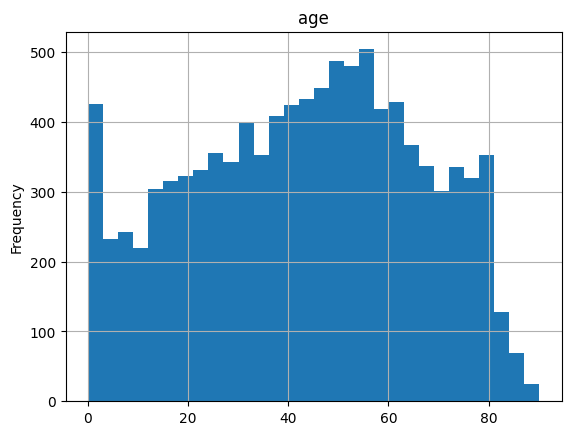

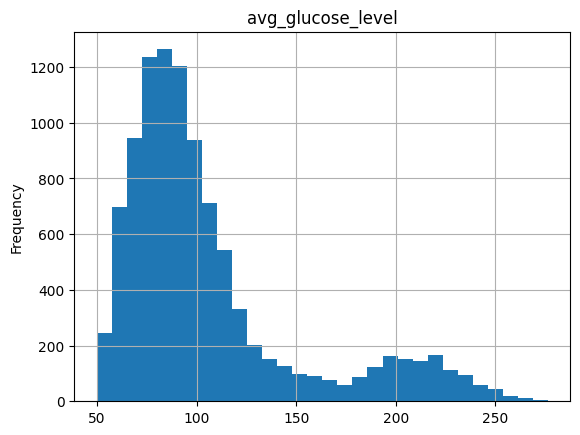

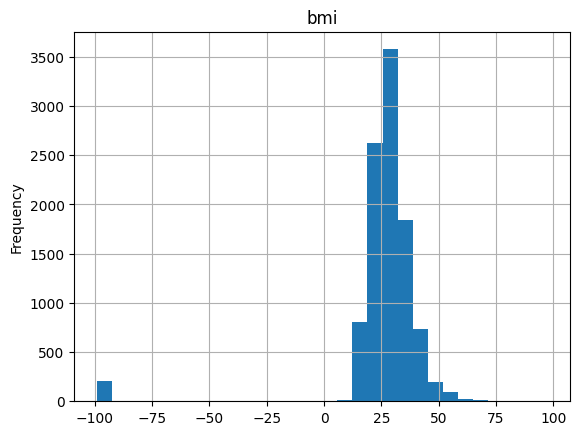

In [ ]:
# plot distribution of numerical features
for f in features_num:
    df[f].plot(kind='hist', bins=30)
    plt.title(f)
    plt.grid()
    plt.show()

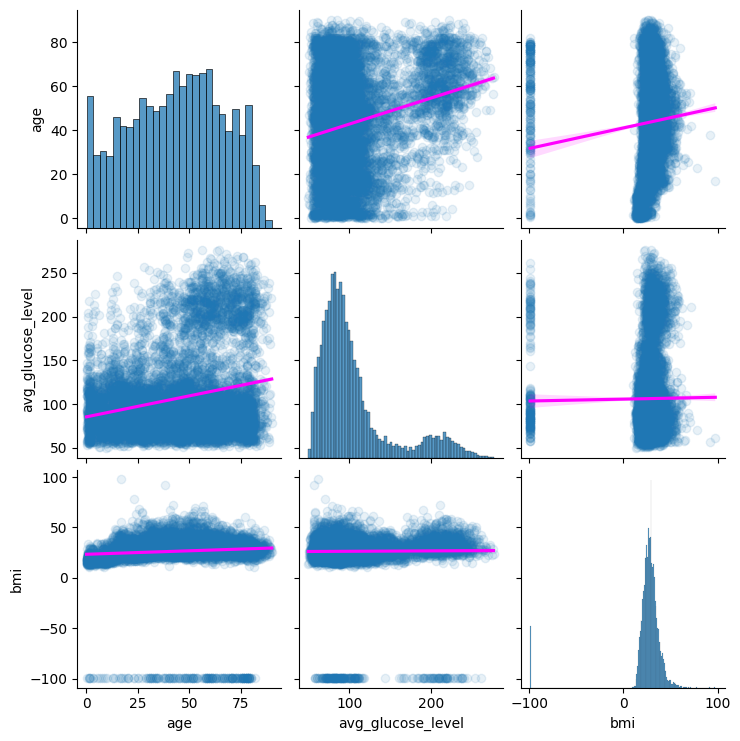

In [ ]:
# pairwise scatter plot
sns.pairplot(df[features_num],
             kind='reg',
             plot_kws={'line_kws':{'color':'magenta'}, 'scatter_kws': {'alpha': 0.1}})
plt.show()

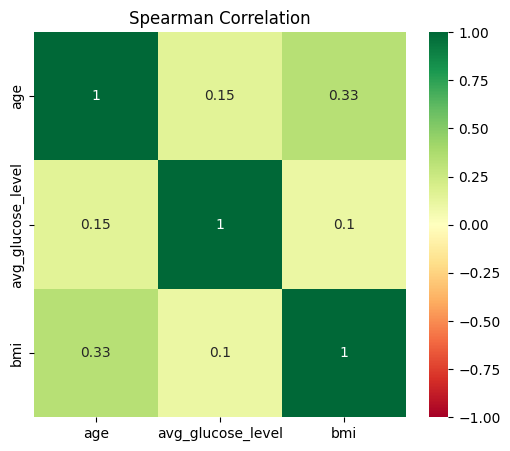

In [ ]:
# Spearman (Rank) correlation
corr_spearman = df[features_num].corr(method='spearman')

fig = plt.figure(figsize = (6,5))
sns.heatmap(corr_spearman, annot=True, cmap="RdYlGn", vmin=-1, vmax=+1)
plt.title('Spearman Correlation')
plt.show()

In [ ]:
df['gender'].value_counts()

,count
gender,
Female,5921
Male,4185
Other,4


In [ ]:
df['ever_married'].value_counts()

,count
ever_married,
Yes,6675
No,3435


In [ ]:
# plt.figure(figsize = (30, 45))
# for i, col in enumerate(df.columns):
#     plt.subplot(5, 4, i+1)
#     sns.histplot(data = df, x = col, kde = True, bins = 10, color = 'g')
# plt.show()

In [ ]:
# fig, ax = plt.subplots(1, 2, figsize = (10,5))
# sns.countplot(data = df, x = 'target', ax = ax[0])
# ax[1].pie(df['target'].value_counts().values,
#           labels = df['target'].value_counts().index,
#           autopct = '%1.1f%%')
# plt.show()

In [ ]:
# fig, ax = plt.subplots(figsize=(14, 6))
# # Plot the pie chart
# ax.set_title('Distribution of Targets', fontsize=20)
# ax.pie(df['target'].value_counts().values,
#        labels=df['target'].value_counts().index,
#        autopct='%1.2f%%')
# plt.show()

In [ ]:
# fig, ax = plt.subplots(figsize = (5, 5))
# sns.countplot(data = df, x = 'heart_disease',hue = df['target'], ax = ax )

In [ ]:
# plt.figure(figsize = (50,60))
# numeric_columns = df.select_dtypes(include=['number']).columns
# for i, col in enumerate(numeric_columns):
#     plt.subplot(10,4, i+1)
#     sns.boxplot(data = df, x = col, color = 'g')
# plt.show()

#

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10110 entries, 0 to 10109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10110 non-null  int64  
 1   gender             10110 non-null  object 
 2   age                10110 non-null  float64
 3   hypertension       10110 non-null  int64  
 4   heart_disease      10110 non-null  int64  
 5   ever_married       10110 non-null  object 
 6   work_type          10110 non-null  object 
 7   residence_type     10110 non-null  object 
 8   avg_glucose_level  10110 non-null  float64
 9   bmi                10110 non-null  float64
 10  smoking_status     10110 non-null  object 
 11  target             10110 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 947.9+ KB


In [ ]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,target
0,9046,Male,67.000000,0,1,Yes,Private,Urban,228.690000,36.600000,formerly smoked,1
1,51676,Female,61.000000,0,0,Yes,Self-employed,Rural,202.210000,-99.000000,never smoked,1
2,31112,Male,80.000000,0,1,Yes,Private,Rural,105.920000,32.500000,never smoked,1
3,60182,Female,49.000000,0,0,Yes,Private,Urban,171.230000,34.400000,smokes,1
4,1665,Female,79.000000,1,0,Yes,Self-employed,Rural,174.120000,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10105,77936,Female,20.876089,0,0,No,Private,Urban,83.674180,20.994031,smokes,0
10106,77937,Male,30.079252,0,0,No,Private,Urban,84.928907,29.138262,Unknown,0
10107,77938,Female,26.740382,0,0,No,Private,Rural,98.411130,23.681892,never smoked,0
10108,77939,Male,66.905128,0,0,Yes,Private,Urban,88.415250,36.546800,formerly smoked,0


In [ ]:
# corr_matrix = df.corr()

# plt.figure(figsize = (20, 10))
# sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1)
# #plt.title('Heat Map of Mobile Price ')
# plt.show()

<a id='5'></a>
# Categorical Features


In [ ]:
features_cat = ['gender','hypertension','heart_disease','ever_married',
                'work_type','residence_type','smoking_status']

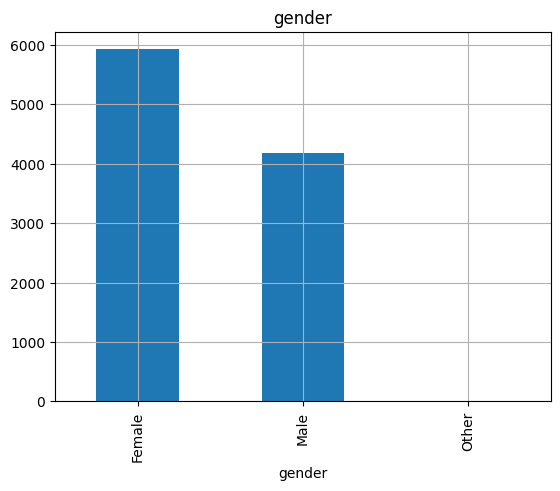

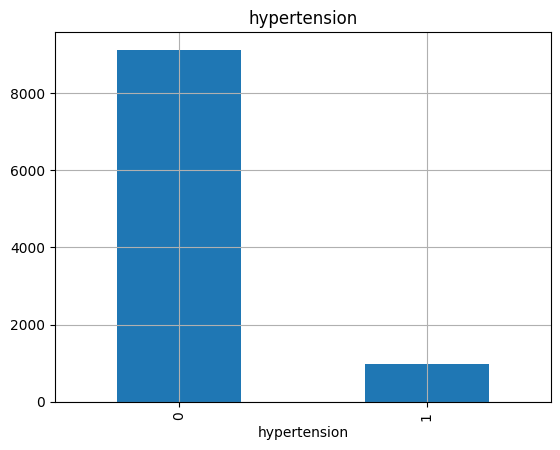

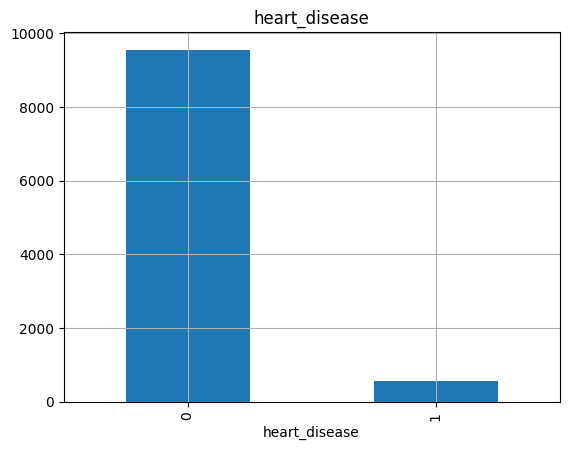

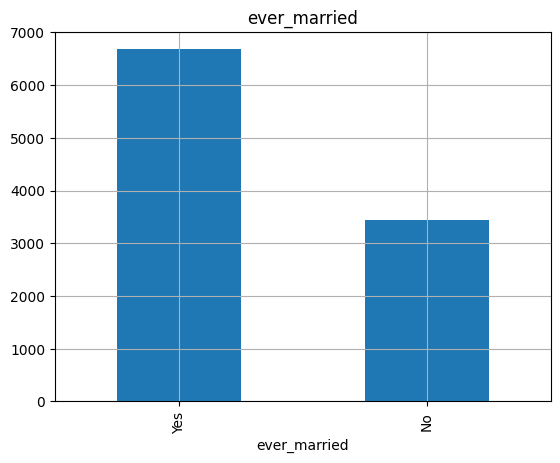

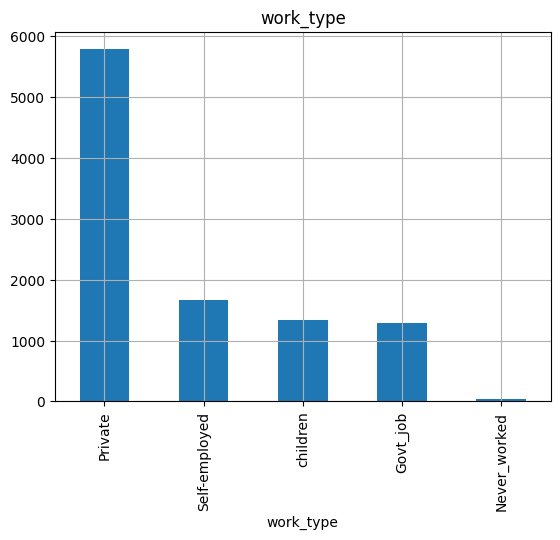

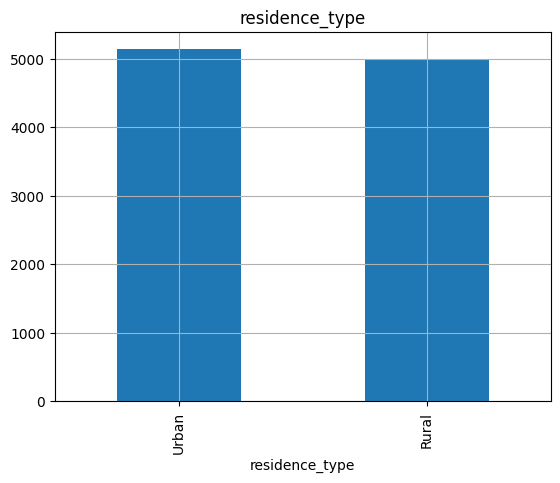

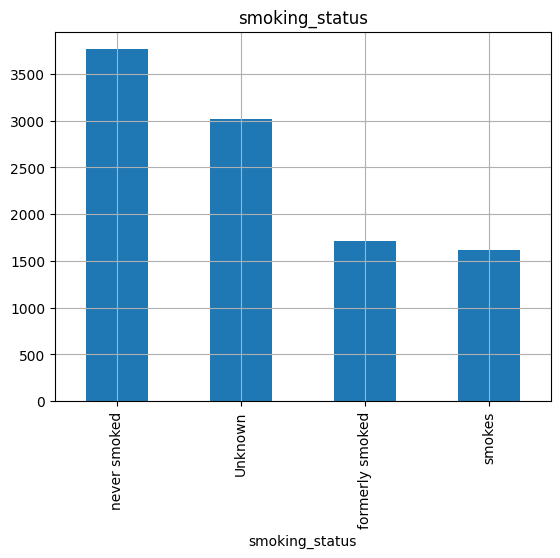

In [ ]:
# plot distribution of categorical features
for f in features_cat:
    df[f].value_counts().plot(kind='bar')
    plt.title(f)
    plt.grid()
    plt.show()

<a id='6'></a>
# Target

In [ ]:
# calc frequencies
target_count = df.target.value_counts()
print(target_count)
print()
print('Percentage of strokes [1]:', np.round(100*target_count[1] / target_count.sum(),2), '%')


target
0    9630
1     480
Name: count, dtype: int64

Percentage of strokes [1]: 4.75 %


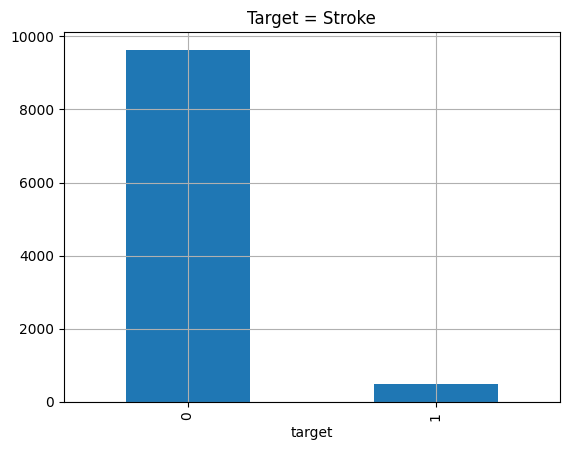

In [ ]:
# plot target distribution
target_count.plot(kind='bar')
plt.title('Target = Stroke')
plt.grid()
plt.show()

### Target vs Numerical Features

In [ ]:
# add binned version of numerical features

# # quantile based:
# df['age_bin'] = pd.qcut(df['age'], q=10, precision=1)
# df['avg_glucose_level_bin'] = pd.qcut(df['avg_glucose_level'], q=10, precision=1)

# # explicitly defined bins:
# df['bmi_bin'] = pd.cut(df['bmi'], [-100,10,20,25,30,35,40,50,100])

In [ ]:
# plot target vs features using mosaic plot
# plt_para_save = plt.rcParams['figure.figsize'] # remember plot settings

# for f in features_num:
#     f_bin = f+'_bin'
#     plt.rcParams["figure.figsize"] = (16,7) # increase plot size for mosaics
#     mosaic(df, [f_bin, 'target'], title='Target vs ' + f + ' [binned]')
#     plt.show()

# # reset plot size again
# plt.rcParams['figure.figsize'] = plt_para_save

# "Naive" Interpretations based on those univariate plots:¶
Risk increases with age and glucose level (diabetes).
High BMI levels are also indicating higher risk.
A missing value for BMI (the leftmost column) seems to indicate a massively increased risk!?


In [ ]:
# BMI - check cross table
# ctab = pd.crosstab(df.bmi_bin, df.target)
# ctab

In [ ]:
# normalize each row to get row-wise target percentages
# (ctab.transpose() / ctab.sum(axis=1)).transpose()

# Almost 20% of the missing BMIs had a stroke! This is way higher than for the other bins.

### Target vs Categorical Features

In [ ]:
# plot target vs features using mosaic plot
# plt_para_save = plt.rcParams['figure.figsize'] # remember plot settings

# for f in features_cat:
#     plt.rcParams["figure.figsize"] = (8,7) # increase plot size for mosaics
#     mosaic(df, [f, 'target'], title='Target vs ' + f)
#     plt.show()

# # reset plot size again
# plt.rcParams['figure.figsize'] = plt_para_save

# "Naive" Interpretations based on those univariate plots:
Influence of gender seems surprisingly low
Hypertension and heart disease massively increase risk of stroke
"Ever married" too!?
Work type: Higher risk for self-employed (more stress?)
Residence type: Slightly higher risk for urban vs rural
Smoking: Highest risk for former smokers. Not much difference between "smokes" and "never smoked"?

In [ ]:
# "ever married" - check cross table
# ctab = pd.crosstab(df.ever_married, df.target)
# ctab

In [ ]:
# normalize each row
# (ctab.transpose() / ctab.sum(axis=1)).transpose()

<a id='6'></a>
# Build Model

In [ ]:
# select predictors
predictors = features_num + features_cat
print('Number of predictors: ', len(predictors))
print(predictors)

Number of predictors:  10
['age', 'avg_glucose_level', 'bmi', 'gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'residence_type', 'smoking_status']


In [ ]:
pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.8/265.8 MB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.46.0.6-py2.py3-none-any.whl size=265859786 sha256=7609b8a70c17e040d9a4e8cf9540c33d0d729c3af3b8065f5fd271ae103e0db8
  Stored in directory: /root/.cache/pip/wheels/0c/95/eb/b449c73f478dbc4557b80170cf7f2aa6db15862877e9a63536
Successfully built h2o


In [ ]:
# ML
import h2o
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators import H2OGradientBoostingEstimator

In [ ]:
# start H2O
h2o.init(max_mem_size='12G', nthreads=4) # Use maximum of 12 GB RAM and 4 cores

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.25" 2024-10-15; OpenJDK Runtime Environment (build 11.0.25+9-post-Ubuntu-1ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.25+9-post-Ubuntu-1ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpp8dfj_8k
  JVM stdout: /tmp/tmpp8dfj_8k/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpp8dfj_8k/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,10 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,2 months and 4 days
H2O_cluster_name:,H2O_from_python_unknownUser_29dzwr
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,12 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,target
0,9046,Male,67.000000,0,1,Yes,Private,Urban,228.690000,36.600000,formerly smoked,1
1,51676,Female,61.000000,0,0,Yes,Self-employed,Rural,202.210000,-99.000000,never smoked,1
2,31112,Male,80.000000,0,1,Yes,Private,Rural,105.920000,32.500000,never smoked,1
3,60182,Female,49.000000,0,0,Yes,Private,Urban,171.230000,34.400000,smokes,1
4,1665,Female,79.000000,1,0,Yes,Self-employed,Rural,174.120000,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10105,77936,Female,20.876089,0,0,No,Private,Urban,83.674180,20.994031,smokes,0
10106,77937,Male,30.079252,0,0,No,Private,Urban,84.928907,29.138262,Unknown,0
10107,77938,Female,26.740382,0,0,No,Private,Rural,98.411130,23.681892,never smoked,0
10108,77939,Male,66.905128,0,0,Yes,Private,Urban,88.415250,36.546800,formerly smoked,0


In [ ]:
# upload data frame in H2O environment
df_hex = h2o.H2OFrame(df)

# convert target to categorical
df_hex['target'] = df_hex['target'].asfactor()

# Convert categorical columns to factors in the H2OFrame
categorical_columns = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'residence_type', 'smoking_status']

for col in categorical_columns:
    df_hex[col] = df_hex[col].asfactor()

# train / test split (70/30)
train_hex, test_hex = df_hex.split_frame(ratios=[0.7], seed=999)

# Convert categorical columns to factors in the test set
for col in categorical_columns:
    test_hex[col] = test_hex[col].asfactor()

# Define column order
column_order = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'target']


# pandas versions of train/test
df_train = train_hex.as_data_frame()
df_test = test_hex.as_data_frame()

# Reorder training and test dataframes
df_train = df_train[column_order]
df_test = df_test[column_order]

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"
/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [ ]:
#df_train.head()
df_test.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,target
0,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
1,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
2,Female,59.0,0,0,Yes,Private,Rural,76.15,-99.0,Unknown,1
3,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1
4,Male,78.0,0,1,Yes,Private,Urban,219.84,-99.0,Unknown,1


In [ ]:
# export for potential external processing
df_train.to_csv('df_train.csv')
df_test.to_csv('df_test.csv')

In [ ]:
# define Gradient Boosting model
fit_1 = H2OGradientBoostingEstimator(ntrees = 100,
                                     max_depth=4,
                                     min_rows=10,
                                     learn_rate=0.01, # default: 0.1
                                     sample_rate=1,
                                     col_sample_rate=0.7,
                                     nfolds=5,
                                     score_each_iteration=True,
                                     stopping_metric='auto',
                                     stopping_rounds=10,
                                     seed=999)

<details> : seed

> seed is a parameter used in machine learning models, specifically here with the H2OGradientBoostingEstimator. It's related to the concept of reproducibility in machine learning.

> Here's how seed works:

> Randomness in Machine Learning: Many machine learning algorithms use randomness during training. This might involve initializing model weights randomly or shuffling data randomly.
Reproducibility Problem: Because of this randomness, if you train the same model twice, you might get slightly different results. This can make it hard to compare experiments or debug issues.

> Seed as a Fix: The seed parameter allows you to control the random number generator used by the algorithm. By setting a specific seed value (like 999 in the code), you ensure that the random operations are performed in the same order every time.
> In essence, seed makes your machine learning experiments reproducible. If you run the code with the same seed value, you will get the same results every time.


> fit_1 = H2OGradientBoostingEstimator(..., seed=999)
Use code with caution
> In this line, seed=999 is setting the random number generator seed for the H2OGradientBoostingEstimator model. This ensures that any random operations inside this model will be predictable and consistent, allowing you to repeat the experiment and get the same outcome. **bold text**

* Sources

docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/algo-params/seed.html
docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/gbm.html
h2oai.github.io/tutorials/introduction-to-machine-learning-with-h2o-3-classification/
h2o-release.s3.amazonaws.com/h2o/rel-turing/10/docs-website/h2o-py/docs/_modules/h2o/estimators/gbm.html
stackoverflow.com/questions/52617898/how-to-make-h2ogridsearch-for-h2ogradientboostingestimator-repeatable-reproduci

In [ ]:
# train model
t1 = time.time()
fit_1.train(x=predictors,
            y='target',
            training_frame=train_hex)
t2 = time.time()
print('Elapsed time [s]: ', np.round(t2-t1,2))

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Elapsed time [s]:  42.78


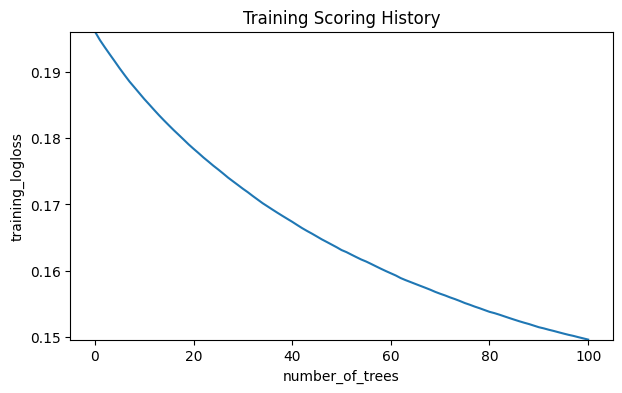

In [ ]:
# show training scoring history
plt.rcParams['figure.figsize']=(7,4)
fit_1.plot()

In [ ]:
# show cross validation metrics
fit_1.cross_validation_metrics_summary().as_data_frame()

,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.898785,0.037621,0.937162,0.837225,0.911683,0.894444,0.913410
1,aic,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
2,auc,0.859603,0.012403,0.847872,0.867446,0.874329,0.862570,0.845800
3,err,0.101215,0.037621,0.062838,0.162775,0.088317,0.105556,0.086590
4,err_count,144.400000,56.042840,93.000000,237.000000,127.000000,152.000000,113.000000
5,f0point5,0.285567,0.042178,0.322581,0.215669,0.314626,0.289548,0.285412
6,f1,0.331129,0.029123,0.321168,0.292537,0.368159,0.350427,0.323353
7,f2,0.406922,0.058571,0.319767,0.454545,0.443645,0.443723,0.372928
8,lift_top_group,7.669686,2.226653,10.009662,7.137255,9.320371,7.578947,4.302198
9,loglikelihood,NaN,0.000000,NaN,NaN,NaN,NaN,NaN


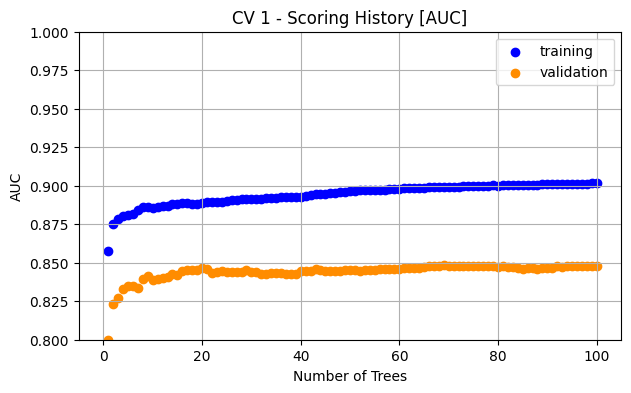

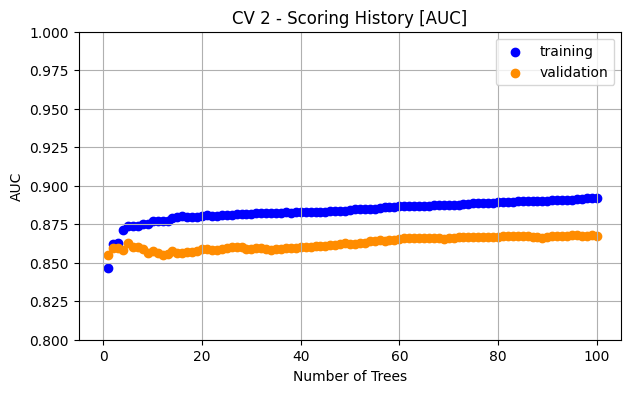

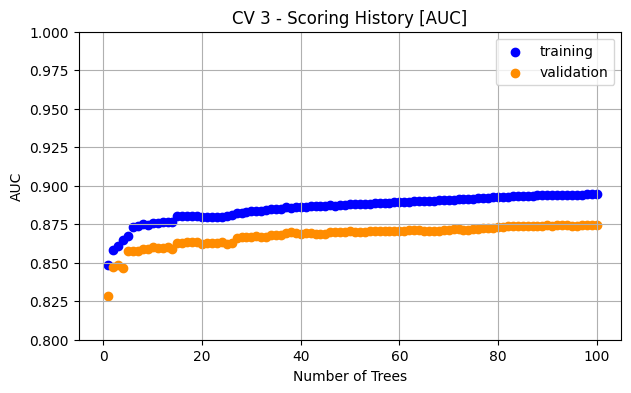

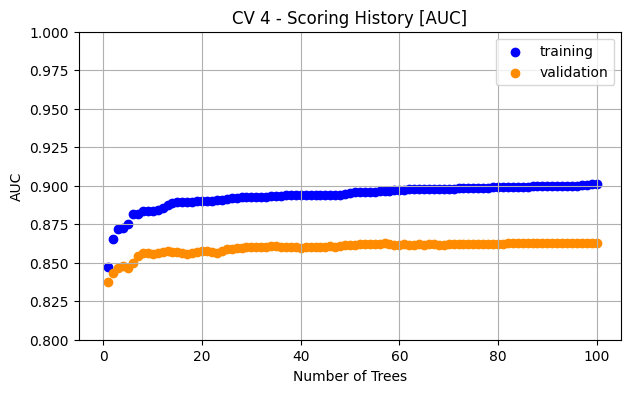

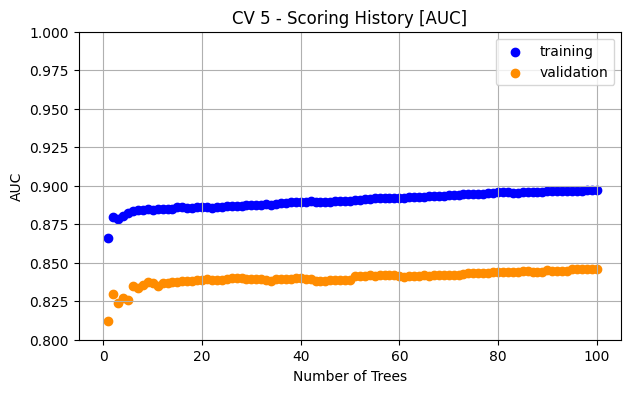

In [ ]:
# show scoring history - training vs cross validations
for i in range(5):
    cv_model_temp = fit_1.cross_validation_models()[i]
    df_cv_score_history = cv_model_temp.score_history()
    my_title = 'CV ' + str(1+i) + ' - Scoring History [AUC]'
    plt.scatter(df_cv_score_history.number_of_trees,
                y=df_cv_score_history.training_auc,
                c='blue', label='training')
    plt.scatter(df_cv_score_history.number_of_trees,
                y=df_cv_score_history.validation_auc,
                c='darkorange', label='validation')
    plt.title(my_title)
    plt.xlabel('Number of Trees')
    plt.ylabel('AUC')
    plt.ylim(0.8,1)
    plt.legend()
    plt.grid()
    plt.show()

# Evaluate on Training Data


ROC Curve - Training Data

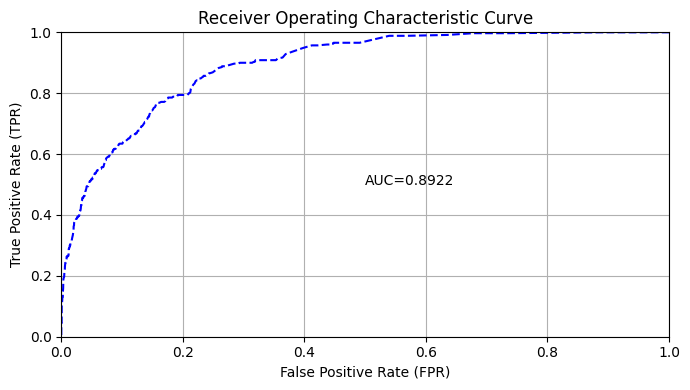

([0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.00014773230905599054,
  0.00014773230905599054,
  0.00014773230905599054,
  0.00014773230905599054,
  0.0002954646181119811,
  0.0002954646181119811,
  0.0002954646181119811,
  0.0002954646181119811,
  0.00044319692716797166,
  0.0005909292362239622,
  0.0005909292362239622,
  0.0005909292362239622,
  0.0005909292362239622,
  0.0005909292362239622,
  0.0005909292362239622,
  0.0005909292362239622,
  0.0007386615452799527,
  0.0007386615452799527,
  0.0007386615452799527,
  0.0007386615452799527,
  0.0007386615452799527,
  0.0007386615452799527,
  0.0007386615452799527,
  0.0008863938543359433,
  0.001034126163391934,
  0.0011818584724479244,
  0.0011818584724479244,
  0.0013295907815039148,
  0.0014773230905599055,
  0.001625055399615896,
  0.001625055399615896,
  0.0017727877086718866,
  0.0017727877086718866,
  0.001920520017727877,
  0.0023637169448958487,
  0.0025114492539518394,
  0.0025114492539518394,
  0.00265918156300

In [ ]:
# training performance
perf_train = fit_1.model_performance(train=True)
perf_train.plot()

ROC Curve - Cross Validation

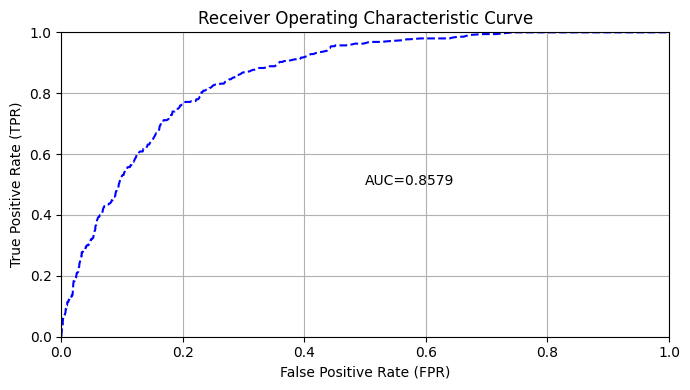

([0.0,
  0.00014773230905599054,
  0.0002954646181119811,
  0.0002954646181119811,
  0.0002954646181119811,
  0.00044319692716797166,
  0.00044319692716797166,
  0.00044319692716797166,
  0.0005909292362239622,
  0.0007386615452799527,
  0.0007386615452799527,
  0.0008863938543359433,
  0.001034126163391934,
  0.001034126163391934,
  0.0013295907815039148,
  0.0017727877086718866,
  0.001920520017727877,
  0.001920520017727877,
  0.002068252326783868,
  0.0023637169448958487,
  0.0023637169448958487,
  0.0023637169448958487,
  0.0023637169448958487,
  0.0023637169448958487,
  0.0025114492539518394,
  0.0026591815630078296,
  0.0028069138720638203,
  0.0031023784901758012,
  0.003250110799231792,
  0.0035455754173437733,
  0.0036933077263997635,
  0.004431969271679716,
  0.004727433889791697,
  0.005022898507903679,
  0.005170630816959669,
  0.00546609543507165,
  0.005761560053183631,
  0.0062047569803516025,
  0.006795686216575565,
  0.0069434185256315555,
  0.007238883143743537,
  0.

In [ ]:
# cross validation performance
perf_cv = fit_1.model_performance(xval=True)
perf_cv.plot()

Confusion Matrix

In [ ]:
# on training data - automatic threshold (optimal F1 score)
conf_train = fit_1.confusion_matrix(train=True)
conf_train.show()

,0,1,Error,Rate
0,6486.0,283.0,0.0418,(283.0/6769.0)
1,177.0,173.0,0.5057,(177.0/350.0)
Total,6663.0,456.0,0.0646,(460.0/7119.0)


In [ ]:
# corresponding accuracy for this threshold:
conf_list_temp = conf_train.to_list()
n_matrix = sum(conf_list_temp[0]) + sum(conf_list_temp[1])
acc_t0 = (conf_list_temp[0][0]+conf_list_temp[1][1]) / n_matrix
print('Accuracy:', np.round(acc_t0,6))

Accuracy: 0.935384


Selecting threshold by optimal F1 is not really helpful here, we have a big difference between actual positives (184) and predicted positives (302). Let's try to improve by selecting the threshold manually:

In [ ]:
# alternatively specify threshold manually - here we try to achieve a symmetric outcome
tt = 0.148
conf_train_man = fit_1.confusion_matrix(train=True, thresholds=tt)
conf_train_man.show()

Could not find exact threshold 0.148; using closest threshold found 0.1479134149017057.


,0,1,Error,Rate
0,6554.0,215.0,0.0318,(215.0/6769.0)
1,204.0,146.0,0.5829,(204.0/350.0)
Total,6758.0,361.0,0.0589,(419.0/7119.0)


In [ ]:
# corresponding accuracy for manual threshold:
conf_list_temp = conf_train_man.to_list()
n_matrix = sum(conf_list_temp[0]) + sum(conf_list_temp[1])
acc_t1 = (conf_list_temp[0][0]+conf_list_temp[1][1]) / n_matrix
print('Accuracy:', np.round(acc_t1,6))

Accuracy: 0.941143


Much better: 184 actual positives vs. 185 predicted positives!

In [ ]:
# check on cross validation
conf_cv_man = fit_1.confusion_matrix(xval=True, thresholds=tt)
conf_cv_man.show()

Could not find exact threshold 0.148; using closest threshold found 0.14836201110518368.


,0,1,Error,Rate
0,6523.0,246.0,0.0363,(246.0/6769.0)
1,251.0,99.0,0.7171,(251.0/350.0)
Total,6774.0,345.0,0.0698,(497.0/7119.0)


In [ ]:
# corresponding accuracy for our manual threshold:
# conf_list_temp = conf_cv_man.to_list()
# n_matrix = sum(conf_list_temp[0]) + sum(conf_list_temp[1])
# acc_t1_CV = (conf_list_temp[0][0]+conf_list_temp[1][1]) / n_matrix
# print('Accuracy:', np.round(acc_t1_CV,6))

Variable Importance

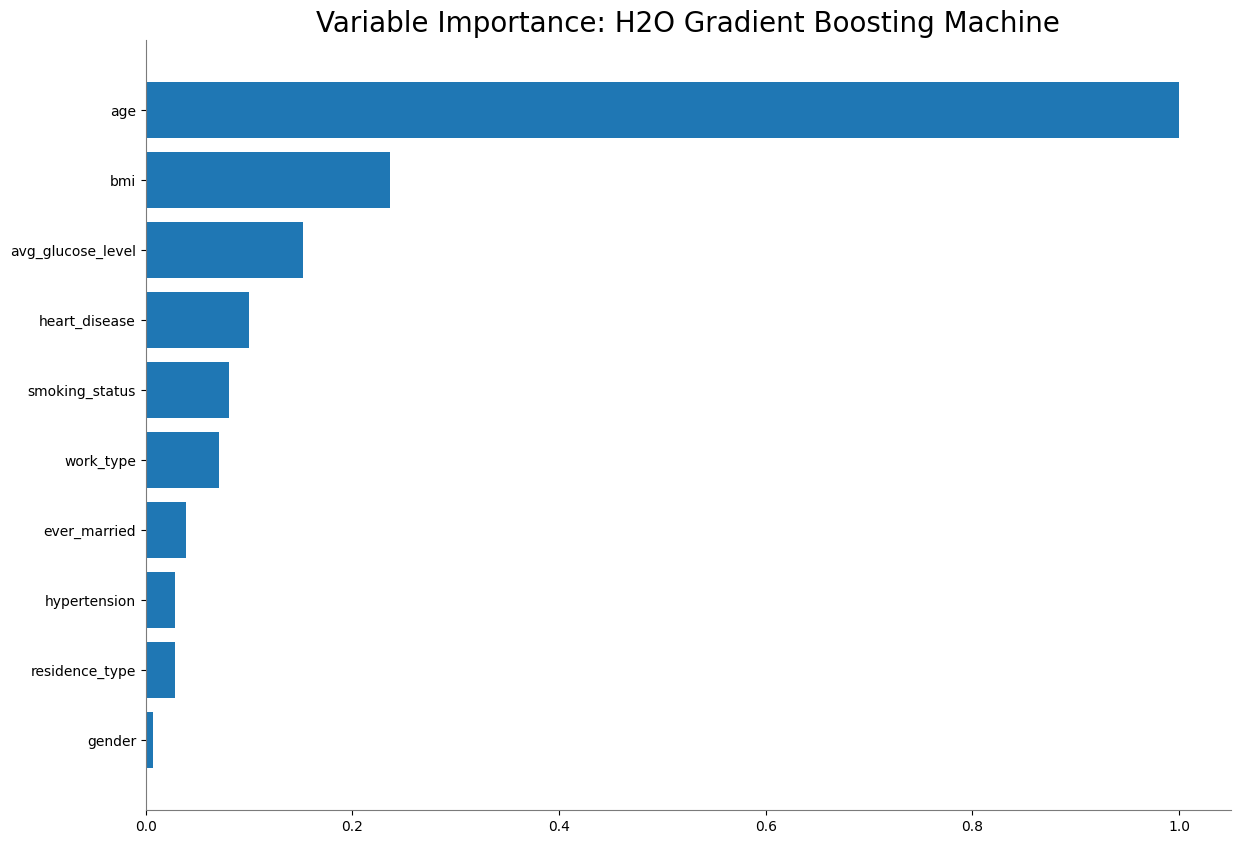

<Figure size 700x400 with 0 Axes>

In [ ]:
# basic version
fit_1.varimp_plot()

In [ ]:
# variable importance using shap values => see direction as well as severity of feature impact
# t1 = time.time()
# fit_1.shap_summary_plot(train_hex);
# t2 = time.time()
# print('Elapsed time [s]: ', np.round(t2-t1,2))

The blue dots for BMI are probably a little bit confusing. They are based on the strongly predictive missing values which we have encoded with -99!

**Predictions on training data**

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


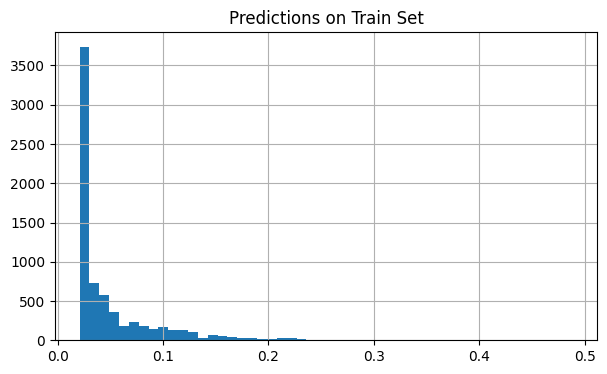

In [ ]:
# predict on train set (extract probabilities only)
pred_train = fit_1.predict(train_hex)['p1']
pred_train = pred_train.as_data_frame().p1

# and plot
plt.hist(pred_train, bins=50)
plt.title('Predictions on Train Set')
plt.grid()
plt.show()

In [ ]:
# check calibration
frequency_pred = sum(pred_train)
frequency_act = df_train.target.sum()
print('Predicted Frequency:', frequency_pred)
print('Actual Frequency   :', frequency_act)

Predicted Frequency: 350.75916377793396
Actual Frequency   : 350


# Evaluate on Test Set

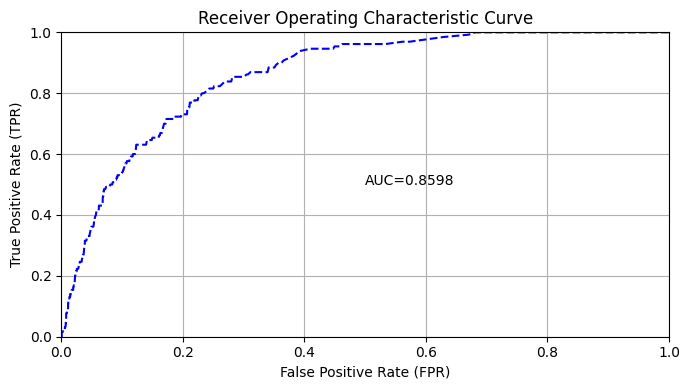

([0.0003495281370150297,
  0.0006990562740300594,
  0.0006990562740300594,
  0.0006990562740300594,
  0.0010485844110450892,
  0.0013981125480601187,
  0.0017476406850751485,
  0.0020971688220901784,
  0.002446696959105208,
  0.002446696959105208,
  0.0027962250961202375,
  0.0031457532331352674,
  0.003495281370150297,
  0.003844809507165327,
  0.004194337644180357,
  0.004543865781195386,
  0.004893393918210416,
  0.005242922055225445,
  0.005592450192240475,
  0.005941978329255505,
  0.005941978329255505,
  0.006641034603285564,
  0.007340090877315624,
  0.007340090877315624,
  0.007689619014330654,
  0.008039147151345682,
  0.008039147151345682,
  0.008388675288360714,
  0.008738203425375743,
  0.009087731562390773,
  0.009786787836420832,
  0.010136315973435861,
  0.01048584411045089,
  0.01118490038448095,
  0.01118490038448095,
  0.01118490038448095,
  0.011534428521495981,
  0.011534428521495981,
  0.01188395665851101,
  0.01223348479552604,
  0.01258301293254107,
  0.012932541

In [ ]:
# calc performance on test test
perf_test = fit_1.model_performance(test_hex)

# ROC Curve - Test Set
perf_test.plot()

In [ ]:
# confusion matrix using our manual threshold
conf_test_man = perf_test.confusion_matrix(thresholds=tt)
conf_test_man.show()

Could not find exact threshold 0.148; using closest threshold found 0.14727200772738858.


,0,1,Error,Rate
0,2775.0,86.0,0.0301,(86.0/2861.0)
1,99.0,31.0,0.7615,(99.0/130.0)
Total,2874.0,117.0,0.0619,(185.0/2991.0)


Quite good: 65 actual positives vs 69 predicted positives.

In [ ]:
# calc accuracy for manual threshold:
conf_list_temp = conf_test_man.to_list()
n_matrix = sum(conf_list_temp[0]) + sum(conf_list_temp[1])
acc_t1_test = (conf_list_temp[0][0]+conf_list_temp[1][1]) / n_matrix
print('Accuracy:', np.round(acc_t1_test,6))

Accuracy: 0.938148


gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


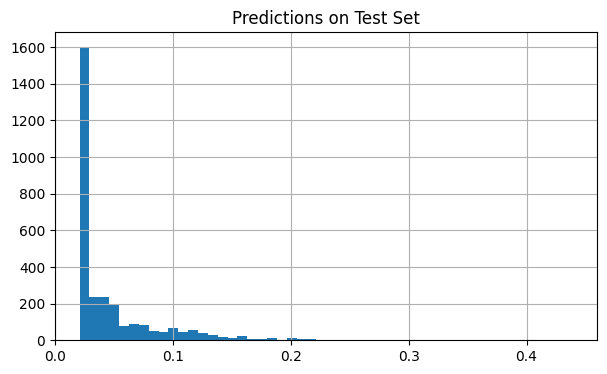

In [ ]:
# predict on test set (extract probabilities only)
pred_test = fit_1.predict(test_hex)['p1']
pred_test = pred_test.as_data_frame().p1

# and plot
plt.hist(pred_test, bins=50)
plt.title('Predictions on Test Set')
plt.grid()
plt.show()

In [ ]:
# connect prediction with data frame
df_test_for_analysis = df_test.copy()
df_test_for_analysis['prediction'] = pred_test

Show examples

In [ ]:
# show most endangered patients (according to our model) in test set
df_high_20 = df_test_for_analysis.nlargest(20, columns='prediction')
df_high_20

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,target,prediction
380,Female,80.000000,0,0,Yes,Govt_job,Urban,84.860000,-99.000000,Unknown,0,0.439284
553,Male,77.000000,0,0,Yes,Private,Urban,74.260000,-99.000000,formerly smoked,0,0.438921
14,Male,78.000000,1,0,Yes,Private,Urban,75.320000,-99.000000,formerly smoked,1,0.432061
21,Male,75.000000,0,0,Yes,Private,Urban,104.720000,-99.000000,Unknown,1,0.374250
475,Male,76.000000,0,1,Yes,Private,Urban,79.050000,-99.000000,Unknown,0,0.327232
1519,Female,80.000000,1,0,Yes,Private,Urban,83.750000,-99.000000,never smoked,0,0.286200
971,Male,81.000000,1,1,No,Private,Rural,220.640000,30.000000,never smoked,0,0.278011
686,Male,77.000000,0,1,Yes,Govt_job,Rural,106.030000,-99.000000,Unknown,0,0.258475
1560,Female,88.789521,1,0,No,Private,Rural,56.115153,23.236769,never smoked,0,0.256407
4,Male,78.000000,0,1,Yes,Private,Urban,219.840000,-99.000000,Unknown,1,0.255510


Check calibration at high end:

In [ ]:
print('Actual cases in highest 20    :', df_high_20.target.sum())
print('Predicted cases in highest 20 :', np.round(df_high_20.prediction.sum(),2))

Actual cases in highest 20    : 3
Predicted cases in highest 20 : 5.75


In [ ]:
# show least endangered patients (according to our model) in test set
df_low_20 = df_test_for_analysis.nsmallest(20, columns='prediction')
df_low_20

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,target,prediction
65,Male,3.0,0,0,No,children,Rural,95.12,18.0,Unknown,0,0.020767
67,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0,0.020767
83,Male,13.0,0,0,No,children,Urban,114.84,18.3,Unknown,0,0.020767
84,Male,4.0,0,0,No,children,Rural,79.17,20.0,Unknown,0,0.020767
103,Male,24.0,0,0,No,Private,Urban,123.10,37.9,never smoked,0,0.020767
121,Male,21.0,0,0,No,Govt_job,Urban,66.07,27.9,Unknown,0,0.020767
126,Male,25.0,0,0,Yes,Private,Rural,95.59,25.1,never smoked,0,0.020767
130,Male,25.0,0,0,No,Private,Rural,96.17,22.1,Unknown,0,0.020767
134,Male,21.0,0,0,Yes,Private,Rural,98.01,24.2,Unknown,0,0.020767
143,Male,10.0,0,0,No,children,Rural,108.79,21.0,Unknown,0,0.020767


Check calibration at low end:

In [ ]:
print('Actual cases in lowest 20    :', df_low_20.target.sum())
print('Predicted cases in lowest 20 :', np.round(df_low_20.prediction.sum(),2))

Actual cases in lowest 20    : 0
Predicted cases in lowest 20 : 0.42


1 way to download file

In [ ]:
# import pickle
# import h2o

In [ ]:
# model_path = h2o.save_model(model=fit_1, path="MINI PROJECT/training", force=True)
# print(model_path)

In [ ]:
# # Download the model through path of the  file:
# from google.colab import files
# files.download("/content/MINI PROJECT/training/GBM_model_python_1736156496487_2239")

In [ ]:
# # Define the new path
# new_model_path = "C:/Users/Ayushman/Videos/MINI PROJECT/WEB INTERFACE/models/my_h2o_model/GBM_model_python_1736156496487_2239"  # this path is for local accessing purpose if you  want to test the model take direct path from the content files
# # Save the new path to the pickle file
# with open("NEW_h2o_model_path.pkl", "wb") as f:
#     pickle.dump(new_model_path, f)

# # Download the updated pickle file
# from google.colab import files
# files.download("NEW_h2o_model_path.pkl")

In [ ]:
# # Load the pickle file
# with open('NEW_h2o_model_path.pkl', 'rb') as f:
#     model_path_from_pickle = pickle.load(f)

# print("Model path from pickle:", model_path_from_pickle)

2nd way to download as pickle

In [ ]:
# import pickle
# import h2o

# # 1. Save the H2O model:
# model_path = h2o.save_model(model=fit_1, path="/content/my_h2o_model", force=True)

# # 2. Pickle the model path:
# with open("h2o_model_path.pkl", "wb") as f:
#     pickle.dump(model_path, f)

# # 3. Download the pickle file:
# from google.colab import files
# files.download("h2o_model_path.pkl")

In [ ]:
# from google.colab import files
# files.download("/content/my_h2o_model/GBM_model_python_1733140306170_1")

In [ ]:
# h2o.init()  # This line should not be indented

# loaded_model = h2o.load_model(model_path)

<h1>TESTING


In [ ]:
pip install h2o

In [ ]:
import pickle
import h2o

h2o.init()  # Start H2O cluster if not already started

# # # Load the pickled model path
# # with open('NEW_h2o_model_path.pkl', 'rb') as f:
# #     model_path_from_pickle = pickle.load(f)

# # # Ensure the model path is correct for H2O's environment
# # # If the model was saved locally, you might need to prepend 'file://'
# # # or adjust the path to the correct location in the H2O file system.

# # # Option 1: Prepend 'file://' if saved locally
# # # model_path = 'file://' + model_path_from_pickle

# # # Option 2: Adjust to the correct H2O file system path
# # model_path = '/content/' + model_path_from_pickle # Assuming you saved it to your google colab content folder

# # # Load the H2O model
# # loaded_model = h2o.load_model(model_path)

loaded_model = h2o.load_model('/content/MINI PROJECT/training/GBM_model_python_1736156496487_1')

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,8 mins 02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,2 months and 4 days
H2O_cluster_name:,H2O_from_python_unknownUser_29dzwr
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,11.99 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
# Example: Creating a DataFrame for a single patient
import pandas as pd
patient_data = pd.DataFrame({
    'gender': ['Female'],
    'age': [45],
    'hypertension': [0],
    'heart_disease': [0],
    'ever_married': ['Yes'],
    'work_type': ['Self-employed'],
    'residence_type': ['Urban'],
    'avg_glucose_level': [92.76],
    'bmi': [22.3],  # Replace with -99 if it's a missing value
    'smoking_status': ['Unknown']
})

In [ ]:
patient_data_hex = h2o.H2OFrame(patient_data)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
predictions = fit_1.predict(patient_data_hex)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [ ]:
predicted_probability = predictions['p1'].as_data_frame().iloc[0, 0] # predictions.as_data_frame().iloc[0, 0]
tt = 0.14727200772738858  # Assuming 'tt' is your defined threshold
if predicted_probability >= tt:
    print("Predicted outcome: Stroke")
else:
    print("Predicted outcome: No Stroke")

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Predicted outcome: No Stroke


<details>
What it means:

This warning is telling you that the conversion from an H2OFrame (H2O's data structure) to a Pandas DataFrame is happening using a single thread.
It suggests that if you want this conversion to be faster, especially for larger datasets, you can install polars and pyarrow libraries and then use the argument use_multi_thread=True in the as_data_frame() method.
Is it necessary?

It's not strictly necessary, but it's a performance optimization. If you're working with smaller datasets, the single-threaded conversion might be quick enough. However, if you have larger datasets and notice delays when converting between H2OFrames and Pandas DataFrames, then addressing this warning can significantly speed up your workflow.
How to address the warning:

Install Polars and Pyarrow

pip install polars==0.19.11
pip install pyarrow==15.0.0
Use code with caution
This installs the recommended versions of libraries that H2O requires for multi-threaded conversion.

Enable Multi-threaded Conversion

When you convert an H2OFrame to a Pandas DataFrame, add the argument use_multi_thread=True:


pandas_df = h2o_df.as_data_frame(use_multi_thread=True)
Use code with caution
By following these steps, you should get rid of the warning and benefit from faster data conversion between H2O and Pandas. Let me know if you need further clarification!

In [ ]:
df_train.dtypes
df_test.dtypes
df_train.dtypes.equals(df_test.dtypes)

True

In [ ]:
from flask import Flask, request, render_template
import os
import pickle
import numpy as np
from tensorflow.keras.preprocessing import image  # type: ignore
import h2o # type: ignore
from h2o.model import ModelBase # type: ignore
from h2o.frame import H2OFrame # type: ignore

# Initialize H2O
h2o.init()

# Flask app initialization
app = Flask(__name__)
app.config['UPLOAD_FOLDER'] = 'uploads' # app.config['UPLOAD_FOLDER'] = r'C:\Users\Ayushman\Videos\MINI PROJECT\WEB INTERFACE\uploads'

# Check if the folder exists, and create it if not
if not os.path.exists(app.config['UPLOAD_FOLDER']):
    os.makedirs(app.config['UPLOAD_FOLDER'])

# Load the H2O model
h2o_model_path = pickle.load(open('C:/Users/Ayushman/Videos/MINI PROJECT/WEB INTERFACE/models/NEWF_h2o_model_path.pkl', 'rb'))
data_table_model = h2o.load_model(h2o_model_path)  # Load H2O model

# Load the CNN model
cnn_model = pickle.load(open('C:/Users/Ayushman/Videos/MINI PROJECT/WEB INTERFACE/models/NEWstroke_identification_model.pkl', 'rb'))

# Function to predict from patient details
def predict_from_details(details):
    # input_data = np.array([list(details.values())])  # Convert details to NumPy array
    input_frame = H2OFrame([details])  # Convert details to H2OFrame
    prediction = data_table_model.predict(input_frame)
    return prediction.as_data_frame().iloc[0, 0] # Return the predicted class


# Function to predict from an image
def predict_from_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize the image
    prediction = cnn_model.predict(img_array)
    return prediction.argmax(axis=1)[0]  # Return the predicted class index

# Combine predictions
def combine_predictions(details, image_path=None):
    # classes = {0: 'Normal', 1: 'Stroke - Ischemic', 2: 'Stroke - Hemorrhagic'}
    classes = {0: 'Normal', 1: 'Stroke', 2: 'Ischemic', 3: 'Hemorrhagic'}
    if image_path:
        # Image prediction
        image_result = predict_from_image(image_path)
        return f"Image Prediction: {classes[image_result]}"
    else:
        # Details prediction
        details_result = predict_from_details(details)
        return f"Details Prediction: {details_result}"

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    # Collect patient details
    try:
        details = {
            # 'id': int(request.form['id']),
            'gender': request.form['gender'],
            'age': int(request.form['age']),
            'hypertension': int(request.form['hypertension']),
            'heart_disease': int(request.form['heart_disease']),
            'ever_married': request.form['ever_married'],
            'work_type': request.form['work_type'],
            'residence_type': request.form['residence_type'],
            'avg_glucose_level': float(request.form['avg_glucose_level']),
            'bmi': float(request.form['bmi']),
            'smoking_status': request.form['smoking_status'],
        }

        # Check if an image is provided
        image = request.files.get('image')
        if image and image.filename != '':
            image_path = os.path.join(app.config['UPLOAD_FOLDER'], image.filename)
            image.save(image_path)
            result = combine_predictions(details, image_path=image_path)
        else:
            result = combine_predictions(details)

        return f"<h1>Prediction Result : </h1><p>{result}</p>"
    except Exception as e:
        return f"<h1>Error:</h1><p>{str(e)}</p>", 400

if __name__ == '__main__':
    # Ensure the uploads folder exists
    # os.makedirs(app.config['UPLOAD_FOLDER'], exist_ok=True)
    app.run(debug=True)
